# 第三章 概率密度函数的估计
---

## 二轮总结笔记


### 一、参数估计

#### 1. 估计的评估标准

1. 无偏性
2. 有效性
3. 一致性

#### 2. 最大似然估计

##### (1) 最大似然估计的方法

最大似然估计在概率论学过，因为考807的一定考数一，大家应该都很熟练了，就不赘述了。

##### (2) 正态分布下的最大似然估计

1. 一维情况：

假设样本为$\mathscr{X}=\{x_1,x_2,\cdots,x_N\}$，则

$$\begin{aligned}
\hat{\mu} &= \frac{1}{N}\sum_{i=1}^Nx_i\\
\hat{\delta}{^2} &= \frac{1}{N}\sum_{i=1}^N(x_i-\hat{\mu})^2
\end{aligned}$$

2. 多维情况：

假设样本为$\mathscr{X}=\{\mathbf{x}_1,\mathbf{x}_2,\cdots,\mathbf{x}_N\}$，则

$$\begin{aligned}
\hat{\boldsymbol{\mu}} &= \frac{1}{N}\sum_{i=1}^N\mathbf{x}_i \\
\hat{\boldsymbol{\Sigma}} &= \frac{1}{N}\sum_{i=1}^N(\mathbf{x}_i - \hat{\boldsymbol{\mu}})(\mathbf{x}_i - \hat{\boldsymbol{\mu}})^\text{T}
\end{aligned}$$

$\hat{\boldsymbol{\mu}}$是一致的，也是无偏的；$\hat{\boldsymbol{\Sigma}}$是一致的，但是不是无偏的，无偏估计是

$$\hat{\boldsymbol{\Sigma}} = \frac{1}{N-1}\sum_{i=1}^N(\mathbf{x}_i - \hat{\boldsymbol{\mu}})(\mathbf{x}_i - \hat{\boldsymbol{\mu}})^\text{T}$$

#### 3. 贝叶斯估计

##### (1) 贝叶斯估计的方法

1. 确定或猜测$\theta$的先验密度$p(\theta)$

2. 求样本联合密度分布

$$
p(\mathscr{X}|\theta) = \prod_{i=1}^N p(\mathbf{x}_i|\theta)
$$

3. 求参数的后验概率密度

$$
p(\theta|\mathscr{X}) = \frac{p(\mathscr{X}|\theta)p(\theta)}{\int_\Theta p(\mathscr{X}|\theta)p(\theta)\text{d}\theta}
$$

4. 求参数估计值

如果损失函数为$\lambda(\hat\theta,\theta)=(\theta - \hat\theta)^2$，则参数估计值就是后验概率的期望

$$
\theta^* = \int_\Theta\theta p(\theta|\mathscr{X})\text{d}\theta
$$

或者可以直接求概率密度函数

$$
p(\mathbf{x}|\mathscr{X}) = \int_\Theta p(\mathbf{x}|\theta) p(\theta|\mathscr{X})\text{d}\theta
$$

##### (2) 一维正态分布时的贝叶斯估计

假设样本为$\mathscr{X}=\{x_1,x_2,\cdots,x_N\}$，$p(x|\theta)\sim N(\mu, \sigma^2)$，$p(\theta)\sim N(\mu_0, \sigma_0^2)$。其中，只有$\mu$是未知的估计量，其他都是已知的，则

$$\begin{aligned}
\hat{\mu} &= \mu_N \\
p(x|\mathscr{X}) &\sim N(\mu_N,\sigma^2 + \sigma_N^2) \\
\mu_N &= \frac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2}\bar{x} + \frac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 \\
\sigma_N^2 &= \frac{\sigma_0^2\sigma^2}{N\sigma_0^2 + \sigma^2}
\end{aligned}$$

##### (3) 贝叶斯学习

贝叶斯学习是通过递推获得参数的后验概率密度，递推公式如下：

$$\begin{aligned}
p(\theta|\mathscr{X}^N) &= \frac{p(\mathbf{x}_N|\theta)p(\theta|\mathscr{X}^{N-1})}{\int_\Theta p(\mathbf{x}_N|\theta)p(\theta|\mathscr{X}^{N-1}) \text{d}\theta} \\ 
p(\theta|\mathscr{X}^0) &= p(\theta)
\end{aligned}$$


### 二、非参数估计

#### 1. 直方图方法

##### (1) 直方图方法的概率密度估计值

假设把样本$\mathbf{x}$的每个分量分割成等间隔的小窗，分割后每个小小区域的体积为$V$，落入某个小区域的样本数量是$k$，样本总数是$N$，那么在这个小区域内，概率密度的估计值为：

$$
\hat{p}(\mathbf{x}) = \frac{k}{NV}
$$

##### (2) 直方图方法估计的一致性条件

假定样本总数为$n$，在$\mathbf{x}$附近落入小舱的样本个数是$k_n$，则当样本趋于无穷多时，$\hat{p}(\mathbf{x})$收敛于$p(\mathbf{x})$的条件是：

$$\begin{aligned}
\lim_{n\rightarrow\infty} V_n &= 0 \\
\lim_{n\rightarrow\infty} k_n &= \infty \\
\lim_{n\rightarrow\infty} \frac{k_n}{n}&= 0 
\end{aligned}$$

#### 2. $k_N$近邻估计方法

##### (1) 估计的方法

1. 指定一个数$k_N$，使其满足上面的一致性条件，比如$k_N \sim \sqrt{N}$
2. 对于样本$\mathbf{x}$，调整包含$\mathbf{x}$的小舱的大小，直到恰好包含$k_N$个样本
3. 概率密度的估计值为：

$$
\hat{p}(\mathbf{x}) = \frac{k_N}{NV}
$$

#### 3. Parzen窗法

##### (1) 估计公式

$$
\hat{p}(\mathbf{x}) = \frac{1}{N}\sum_{i=1}^{N}K(\mathbf{x}, \mathbf{x}_i)
$$

或

$$
\hat{p}(\mathbf{x}) = \frac{1}{Nh^d}\sum_{i=1}^{N}\varphi(\frac{\mathbf{x}-\mathbf{x}_i}{h})
$$

##### (2) 窗函数（核函数）

1. 方窗

$$
K(\mathbf{x}, \mathbf{x}_i) = \begin{cases}\displaystyle \frac{1}{h^d} &\displaystyle若|x^j-x_i^j|\leqslant\frac{h}{2}\\ 0 &其他\end{cases}
$$

2. 高斯窗（正态窗）

一维情况下：

$$
K(x, x_i) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-x_i)^2}{2\sigma^2}\right\}
$$

3. 超球窗

$$
K(\mathbf{x}, \mathbf{x}_i) = \begin{cases}V^{-1} &若||\mathbf{x}-\mathbf{x}_i||\leqslant \rho\\ 0 &其他\end{cases} 
$$

其中$\rho$是超球体的半径，$V$是超球体的体积

$$
V = \frac{\pi^{\frac{d}{2}}}{\frac{d}{2}!} \rho^d
$$

##### (3) 性质

1. 渐进无偏
2. 平方误差一致
3. 窗函数的选择不如宽窗参数影响大

---

## 一轮学习笔记（包含代码实现）

首先导包并且生成数据（以一维正态分布为例）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x是样本数据
x = np.random.randn(256)  # 生成的数据服从标准正态分布
print("样本大小为：", x.shape)

样本大小为： (256,)


In [3]:
# x_axis是要估计概率密度的点，用于画图
x_axis = np.arange(-3.5, 3.51, 0.07)
print("要估计概率密度的样本点个数为：", x_axis.shape[0])

要估计概率密度的样本点个数为： 101


### 一、$k_N$近邻估计方法

In [4]:
def k_N_estimate(_x: float, samples: np.ndarray, k_N: int) -> float:
    """
    k_N近邻法估计概率密度
    :param _x: 要估计概率密度的样本点
    :param samples: 给定的样本
    :param k_N: 指定的每个小舱中的样本数量
    :return: 估计的概率密度
    """
    if k_N <= 2:
        raise Exception("k_N太小了")
    if samples.shape[0] < k_N:
        raise Exception("k_N不能比样本数量还多")

    # 先排序方便查找
    samples.sort(0)

    # 找到离_x最近的k_N个样本，我就不写二分查找了，直接遍历
    i, j = 0, samples.shape[0] - 1
    while i < j and _x > samples[i]:
        i += 1
    if i > 0:
        i -= 1
    while i < j < samples.shape[0] and _x < samples[j]:
        j -= 1
    if j < samples.shape[0] - 1:
        j += 1
    if i == j:
        if i > 0:
            i -= 1
        else:
            j += 1
    if j - i != 1:
        i += 1
    for k in range(k_N // 2 - 1):
        if i > 0:
            i -= 1
        else:
            j += 1
        if j < samples.shape[0] - 1:
            j += 1
        else:
            i -= 1
    if k_N % 2 == 1:
        if i > 0:
            i -= 1
        else:
            j += 1
    return k_N / (samples.shape[0] * (samples[j] - samples[i]))

下面在$N=256$，$k_N=16$的情况下，运行$k_N$近邻估计，将得到的概率密度可视化的显示出来。

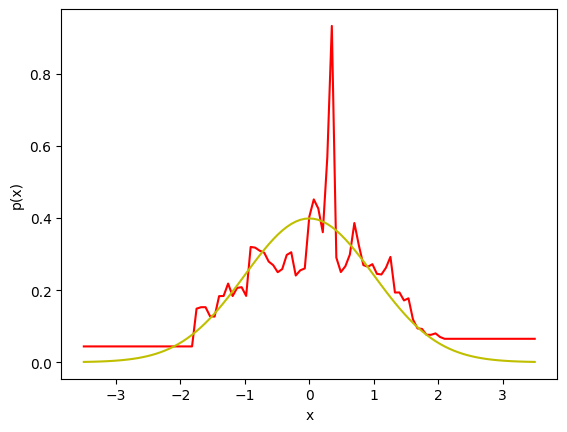

In [5]:
y_axis = []
for xi in x_axis:
    y_axis.append(k_N_estimate(xi, x, 16))

# 这个是标准正态分布的数值（真实概率密度）
y_axis_ideal = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x_axis ** 2)

plt.xlabel("x")
plt.ylabel("p(x)")
_plot1 = plt.plot(x_axis, y_axis, color='r')
_plot2 = plt.plot(x_axis, y_axis_ideal, color='y')

红色的曲线是$k_N$近邻法估计的概率密度，黄色的曲线是实际的概率密度（标准正态分布），可以看到总体估计效果还可以。

### 二、Parzen窗法

下面实现$\sigma=4/\sqrt{N}$的高斯窗估计。

In [6]:
def gauss_window(_x: float, _y: float, sigma: float) -> float:
    """
    计算高斯窗函数的输出
    :param _x: 样本x
    :param _y: 样本x_i
    :param sigma: 窗口宽度（平滑参数）
    :return: 高斯窗结算结果
    """
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * (_x - _y) ** 2 / sigma ** 2)


def parzen_estimate(_x: float, samples: np.ndarray, window, h: float) -> float:
    """
    Parzen估计
    :param _x: 要估计概率密度的样本点
    :param samples: 给定的样本
    :param window: 窗函数
    :param h: 窗口宽度（平滑参数）
    :return: 估计的概率密度
    """
    ret = 0.0
    for sample in samples:
        ret += window(_x, sample, h)
    ret /= samples.shape[0]
    return ret

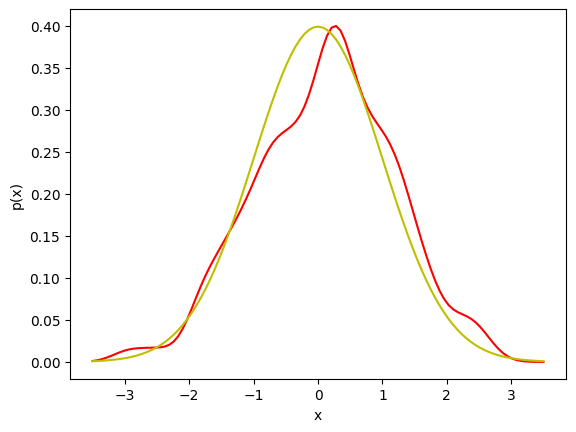

In [8]:
y_axis = []
for xi in x_axis:
    y_axis.append(parzen_estimate(xi, x, gauss_window, 4 / np.sqrt(x.shape[0])))

plt.xlabel("x")
plt.ylabel("p(x)")
_plot1 = plt.plot(x_axis, y_axis, color='r')
_plot2 = plt.plot(x_axis, y_axis_ideal, color='y')

红色的曲线是Parzen窗法估计的概率密度，黄色的曲线是实际的概率密度（标准正态分布），可以看到Parzen窗法的估计效果非常好，远远优于$k_N$近邻估计。